## MA-IRL 
- 3 player nonlinear case
- asynchronous update

commit: aad773f945da1882fa48732b6ac22f6062a71bbf

In [1]:
using PyPlot
using JLD2, FileIO
using StatsBase, LinearAlgebra

In [2]:
@load "../data/2020-07-17T16:38:36.539.jld2"  data     # normalized feature

1-element Array{Symbol,1}:
 :data

In [3]:
data

Dict{Any,Any} with 7 entries:
  "demonstration_utrajectory"    => Any[[0.56472 -0.217536 … -0.343469 0.644939…
  "theta_est"                    => [1.07957 1.02464 … 0.647456 10.8093; 0.8548…
  "demonstration_xtrajectory"    => Any[[-4.0 0.0 … 1.33 2.0944; -3.867 0.0 … 1…
  "feature_counts_proposed"      => [11.787 110.716 … 282.538 6.17288; 3.86915 …
  "x_reference"                  => [-4.0 0.0 … 1.33 2.0944; -3.867 0.0 … 1.33 …
  "feature_counts_demonstration" => [8.09791, 85.6761, 5.6577, 154.96, 341.023,…
  "true theta"                   => [1.0, 1.0, 8.0, 0.5, 0.5, 10.0, 0.5, 0.5, 8…

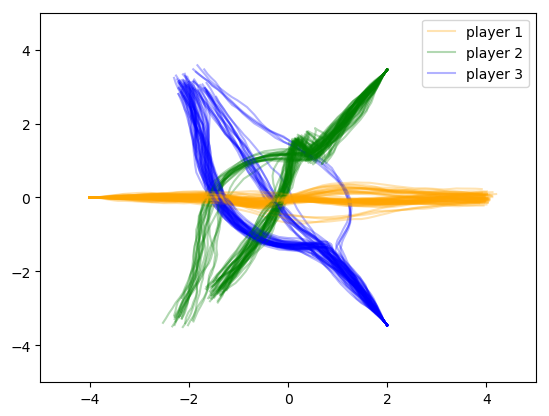

PyObject <matplotlib.legend.Legend object at 0x7efd92b57450>

In [4]:
demos = reshape(vcat(data["demonstration_xtrajectory"]...), (61, 200, 12))
fig, ax = subplots(1,1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
for i = 1:size(demos)[1]
    ax.plot(demos[:,i,1], demos[:,i,2], color="orange", alpha=0.3)
    ax.plot(demos[:,i,5], demos[:,i,6], color="green", alpha=0.3)
    ax.plot(demos[:,i,9], demos[:,i,10], color="blue", alpha=0.3)
end
ax.plot(demos[:,1,1], demos[:,1,2], color="orange", alpha=0.3, label="player 1")
ax.plot(demos[:,1,5], demos[:,1,6], color="green", alpha=0.3,  label="player 2")
ax.plot(demos[:,1,9], demos[:,1,10], color="blue", alpha=0.3,  label="player 3")
ax.legend()

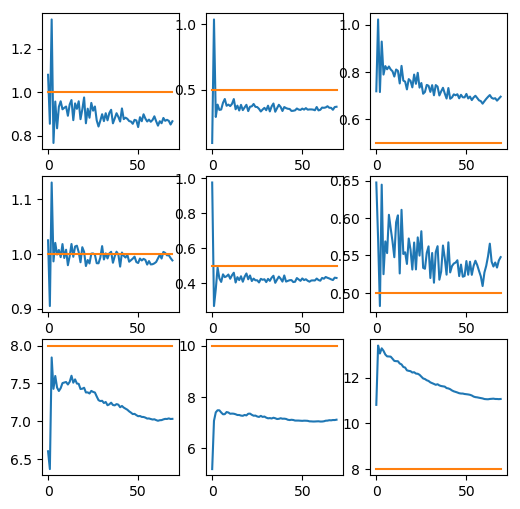

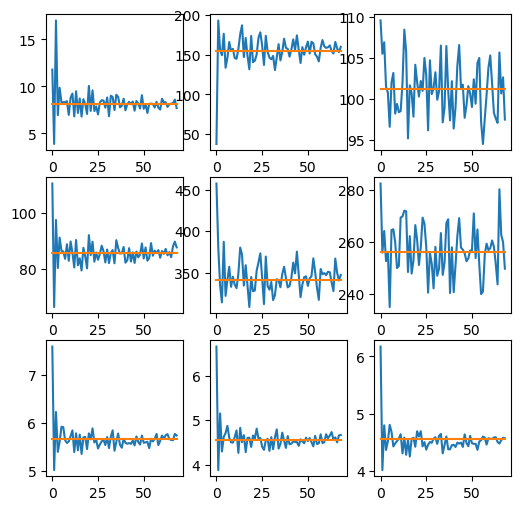

In [5]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 3
cols = 3
figsize=(6,6)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 3
cols = 3 
figsize=(6,6)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [6]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:3]' * data["true theta"][1:3]
cost_dem_2 = data["feature_counts_demonstration"][4:6]' * data["true theta"][4:6]
cost_dem_3 = data["feature_counts_demonstration"][7:9]' * data["true theta"][7:9]
println(" demo feature counts ", data["feature_counts_demonstration"][1:3], " ", 
                                 data["feature_counts_demonstration"][4:6], " ",
                                 data["feature_counts_demonstration"][7:9])
println(" true theta ", data["true theta"][1:3], " ", data["true theta"][4:6], " ", data["true theta"][7:9])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2, 
                " and player 3- ", cost_dem_3)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-10:end,:], dims=1)
println(" est feature counts ", fc_avg[1:3], " ", fc_avg[4:6], " ", fc_avg[7:9])
theta_avg = mean(data["theta_est"][end-10:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:3], theta_avg[4:6], theta_avg[7:9])
cost_est_1 = fc_avg[1:3]' * theta_avg[1:3]
cost_est_2 = fc_avg[4:6]' * theta_avg[4:6]
cost_est_3 = fc_avg[7:9]' * theta_avg[7:9]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2, " and player 3- ", cost_est_3)

 ----- demonstration ---- 
 demo feature counts [8.09791, 85.6761, 5.6577] [154.96, 341.023, 4.56104] [101.265, 256.364, 4.54907]
 true theta [1.0, 1.0, 8.0] [0.5, 0.5, 10.0] [0.5, 0.5, 8.0]
 this is demonstrated cost: player 1- 139.0356439699773 and player 2- 293.6021504234806 and player 3- 215.20710314309412
 ----- estimation ---- 
 est feature counts [8.10274, 86.3169, 5.67871] [159.191, 347.132, 4.60722] [101.016, 258.269, 4.54041]
 estimated  theta [0.866902, 0.993582, 7.02553][0.360586, 0.425598, 7.07064][0.686867, 0.538958, 11.068]
 this is estimated cost: player 1- 132.68317008153963 and player 2- 237.71680178178758 and player 3- 258.8340593277059
